# Grafo del experimtento.
Primero, importamos las librerías

In [27]:
import math

import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable

Leemos la tabla de datos, y la imprimimos

In [28]:
# Use pandas to read the data from the csv file.
df = pd.read_csv('nodos.csv')
# Create a dictionary with the data from the csv file.
data = {'key': df['key'], 'x': df['x'], 'y': df['y'], 'cantidad': df['cantidad'], 'mineral': df['Mineral']}
df

,key,x,y,cantidad,Mineral
0,A,9083,6551,2,Au
1,B,9008,6504,2,Au
2,C,8950,6477,2,Au
3,D,8910,6415,2,Au
4,E,8881,6404,2,Au
5,F,8833,6407,3,Au
6,G,9123,6314,3,Fe
7,H,9162,6310,2,Fe
8,I,9084,6246,3,Fe
9,J,9146,6231,2,Fe


Creamos un grafo con las aristas, y pesos

In [62]:
G = nx.path_graph(0)
distance = lambda a, b, c, d: math.sqrt((a - b) ** 2 + (c - d) ** 2)
edges = {(i, j, distance(a, b, c, d))
         for i, a, b in zip(data['key'], data['x'], data['y'])
         for j, c, d in zip(data['key'], data['x'], data['y']) if i != j}
G.add_weighted_edges_from(edges)
nodes = {i: (j, k)
         for i, j, k in zip(data['key'], data['x'], data['y'])}
edges2 = {i: sorted([(j, k) for l, j, k in edges if i == l]) for i in data['key']}
print(edges2['B'])

[('A', 3561.044790507415), ('C', 3519.3387162931617), ('D', 3534.8325278575785), ('E', 3522.150621424359), ('F', 3486.4727160842663), ('G', 3763.0435819958293), ('H', 3795.249662406941), ('I', 3784.740413819685), ('J', 3842.8168054176094), ('K', 3888.526841877268), ('L', 3766.777402502038), ('M', 3725.868623556123), ('N', 3665.562030575939), ('O', 3663.3716710156505), ('P', 3631.379352257211), ('Q', 3622.6978896949163), ('R', 3647.344239306183), ('S', 3668.4842919113066), ('T', 3697.8178700417357)]


Dibujamos el grafo

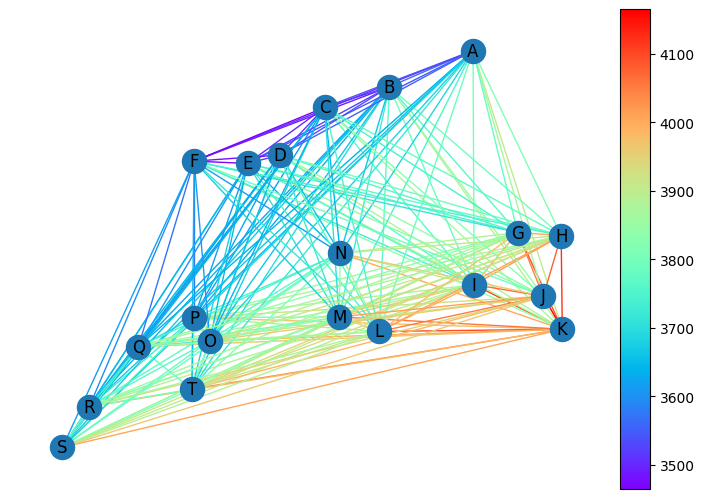

In [49]:
#Creamos el grafo
nx.draw(G, nodes, edge_color=[G[u][v]['weight'] for (u, v) in G.edges()],
        edge_cmap=plt.cm.rainbow, with_labels=True)

# Creamos la barra de color
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)
pesosw = list([G[u][v]['weight'] for (u, v) in G.edges()])
norm = mpl.colors.Normalize(vmin=min(pesosw), vmax=max(pesosw))
cb1 = mpl.colorbar.ColorbarBase(ax=ax_cb, cmap=plt.cm.rainbow, norm=norm, orientation='vertical')
plt.gcf().add_axes(ax_cb)

#Mostramos la imagen
plt.show()

In [31]:
print("El arbol completo tiene " + str(len(G.edges)) + " aristas\n")


El arbol completo tiene 190 aristas



Copiamos el grafo a otro, y le reducimos el número de aristas, a las aristas con un peso inferior a 200

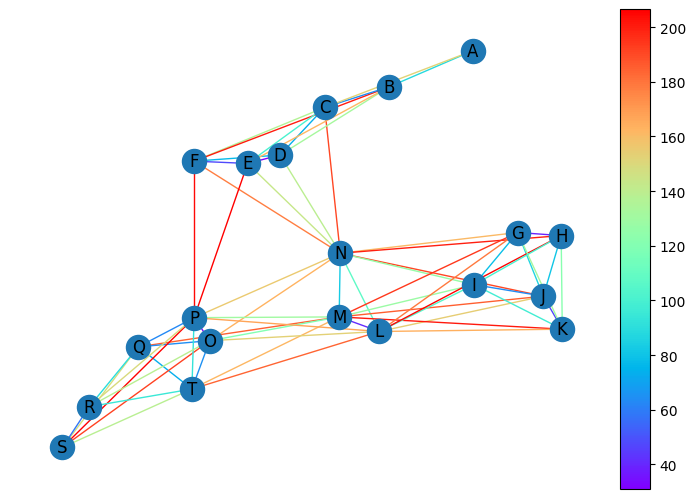

In [32]:

G2 = G.copy()
max_weight = 210
G2.remove_edges_from([(u, v) for (u, v, d) in G2.edges(data=True) if d['weight'] > max_weight])

# Dibujamos el grafo
nx.draw(G2, nodes, edge_color=[G2[u][v]['weight'] for (u, v) in G2.edges()],
        edge_cmap=plt.cm.rainbow, with_labels=True)

# Creamos la barra de color
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)
pesosw = list([G2[u][v]['weight'] for (u, v) in G2.edges()])
norm = mpl.colors.Normalize(vmin=min(pesosw), vmax=max(pesosw))
cb1 = mpl.colorbar.ColorbarBase(ax=ax_cb, cmap=plt.cm.rainbow, norm=norm, orientation='vertical')
plt.gcf().add_axes(ax_cb)

#Mostramos imagen
plt.show()

Por lo tanto, podemos calcular en número de aritas:

In [33]:
print("El arbol reducido tiene " + str(len(G2.edges)) + " aristas\n")

El arbol reducido tiene 68 aristas



Podemos calcular el árbol mínimo de dispersión

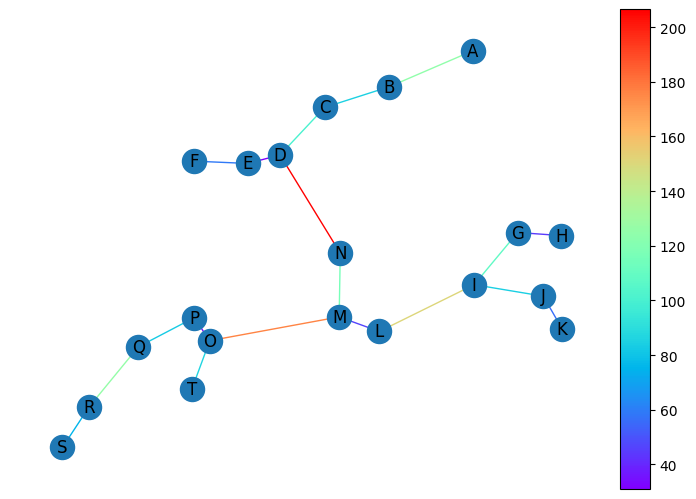

In [34]:
# Create a new graph of the minimum spanning tree of the original graph.
MST = nx.minimum_spanning_tree(G)
# Plot the graph.
nx.draw(MST, nodes, edge_color=[MST[u][v]['weight'] for (u, v) in MST.edges()], edge_cmap=plt.cm.rainbow,
        with_labels=True)

# Creamos la barra de color
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)
pesosw = list([G2[u][v]['weight'] for (u, v) in G2.edges()])
norm = mpl.colors.Normalize(vmin=min(pesosw), vmax=max(pesosw))
cb1 = mpl.colorbar.ColorbarBase(ax=ax_cb, cmap=plt.cm.rainbow, norm=norm, orientation='vertical')
plt.gcf().add_axes(ax_cb)

# Mostramos imagen
plt.show()
